# March International Break English Premier League Analysis - Adesina Adeniran

## Introduction

The March International Break is the last international break of the Premier League calendar and provides teams and players with the opportunity to have some time off from their league responsibilities to fulfill their national duties. The pace of the Premier League takes a toll on players and staff alike, and this period is used by many for not only a physical but a mental reset. As we enter the final stage of the Premier League season, some aspects of the league look set in stone, with Liverpool all but securing the League title with 9 games to go, and teams like Southampton, Leicester, and Ipswich Town all but certain to return to the Championship. With this analysis, I seek to understand the implications of the statistics of the various premier league teams on their actual league position. In today's sports landscape, the proliferation of metrics to define success has helped teams determine areas of strength and weakness, especially metrics like Expected Goals (xG) and Expected Goals Against (xGA). How telling are these metrics, however, in determining the actual positions that teams find themselves after more than 3 quarters of the season gone?

## Dataset

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
from google.colab import drive
drive.mount('/content/drive')
shared_folder_path = '/content/drive/MyDrive/epl prediction project/'
current_table1 = pd.read_csv('/content/drive/MyDrive/epl prediction project/current_table - Sheet1.csv')
fixtures = pd.read_csv('/content/drive/MyDrive/epl prediction project/fixtures - Sheet1.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For this analysis, I have imported the Premier League table, along with a table of the remaining fixtures from fbref.com, a leading football stats website. The tables come with the appropriate statistics concerning wins, losses, and draws, but also include deeper statistics on xG, xGA, xGD, and Form to allow for a more meaningful analysis. Some feature engineering will be required to create even more metrics.

In [96]:
#current_table1 = pd.read_csv('current_table - Sheet1.csv')

In [97]:
#fixtures = pd.read_csv('fixtures - Sheet1.csv')
fixtures.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,30,Tue,2025-04-01,19:45 (14:45),Wolves,NaN,NaN,NaN,West Ham,NaN,Molineux Stadium,NaN,Head-to-Head,NaN
1,30,Tue,2025-04-01,19:45 (14:45),Arsenal,NaN,NaN,NaN,Fulham,NaN,Emirates Stadium,NaN,Head-to-Head,NaN
2,30,Tue,2025-04-01,20:00 (15:00),Nott'ham Forest,NaN,NaN,NaN,Manchester Utd,NaN,The City Ground,NaN,Head-to-Head,NaN
3,30,Wed,2025-04-02,19:45 (14:45),Brighton,NaN,NaN,NaN,Aston Villa,NaN,The American Express Stadium,NaN,Head-to-Head,NaN
4,30,Wed,2025-04-02,19:45 (14:45),Newcastle Utd,NaN,NaN,NaN,Brentford,NaN,St James' Park,NaN,Head-to-Head,NaN


In [98]:
current_table1.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,29,21,7,1,69,27,42,70,2.41,65.0,25.1,39.8,1.37,W\n D\n W\n W\n W,"60,300",Mohamed Salah - 27,Alisson,NaN
1,2,Arsenal,29,16,10,3,53,24,29,58,2.00,44.5,24.7,19.8,0.68,W\n L\n D\n D\n W,"60,277",Kai Havertz - 9,David Raya,NaN
2,3,Nott'ham Forest,29,16,6,7,49,35,14,54,1.86,36.5,34.0,2.5,0.09,L\n L\n D\n W\n W,"30,080",Chris Wood - 18,Matz Sels,NaN
3,4,Chelsea,29,14,7,8,53,37,16,49,1.69,55.9,39.5,16.4,0.57,L\n L\n W\n W\n L,"39,610",Cole Palmer - 14,Robert Sánchez,NaN
4,5,Manchester City,29,14,6,9,55,40,15,48,1.66,51.4,39.4,12.0,0.41,W\n L\n W\n L\n D,"52,897",Erling Haaland - 21,Ederson,NaN


In [99]:
current_table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   MP               20 non-null     int64  
 3   W                20 non-null     int64  
 4   D                20 non-null     int64  
 5   L                20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GA               20 non-null     int64  
 8   GD               20 non-null     int64  
 9   Pts              20 non-null     int64  
 10  Pts/MP           20 non-null     float64
 11  xG               20 non-null     float64
 12  xGA              20 non-null     float64
 13  xGD              20 non-null     float64
 14  xGD/90           20 non-null     float64
 15  Last 5           20 non-null     object 
 16  Attendance       20 non-null     object 
 17  Top Team Scorer  2

In [100]:
current_table1['Last 5'] = current_table1['Last 5'].str.replace('\n', " ").str.strip()

In [101]:
current_table1['Attendance'] = current_table1['Attendance'].str.replace(',','').astype(int)

In [102]:
current_table1['Last 5'] = current_table1['Last 5'].astype(str)

In [103]:
current_table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   MP               20 non-null     int64  
 3   W                20 non-null     int64  
 4   D                20 non-null     int64  
 5   L                20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GA               20 non-null     int64  
 8   GD               20 non-null     int64  
 9   Pts              20 non-null     int64  
 10  Pts/MP           20 non-null     float64
 11  xG               20 non-null     float64
 12  xGA              20 non-null     float64
 13  xGD              20 non-null     float64
 14  xGD/90           20 non-null     float64
 15  Last 5           20 non-null     object 
 16  Attendance       20 non-null     int64  
 17  Top Team Scorer  2

In [104]:
current_table1 = current_table1[['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'Last 5', 'Attendance', 'Top Team Scorer']]
current_table1.rename(columns={
    'Rk': 'Position',
    'Squad': 'Team',
    'MP': 'Matches Played',
    'W': 'Wins',
    'D': 'Draws',
    'L': 'Losses',
    'GF': 'Goals For',
    'GA': 'Goals Against',
    'GD': 'Goal Difference',
    'Pts': 'Points',
    'xG': 'Expected Goals',
    'xGA': 'Expected Goals Against',
    'Last 5': 'Form (Last 5)'
}, inplace=True)

current_table1.head()

<ipython-input-104-6ba07c3c3265>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_table1.rename(columns={


,Position,Team,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Expected Goals,Expected Goals Against,Form (Last 5),Attendance,Top Team Scorer
0,1,Liverpool,29,21,7,1,69,27,42,70,65.0,25.1,W D W W W,60300,Mohamed Salah - 27
1,2,Arsenal,29,16,10,3,53,24,29,58,44.5,24.7,W L D D W,60277,Kai Havertz - 9
2,3,Nott'ham Forest,29,16,6,7,49,35,14,54,36.5,34.0,L L D W W,30080,Chris Wood - 18
3,4,Chelsea,29,14,7,8,53,37,16,49,55.9,39.5,L L W W L,39610,Cole Palmer - 14
4,5,Manchester City,29,14,6,9,55,40,15,48,51.4,39.4,W L W L D,52897,Erling Haaland - 21


## Feature Engineering

In [105]:
current_table1['Expected Goals Difference'] = current_table1['Expected Goals'] - current_table1['Expected Goals Against']
current_table1.head()

<ipython-input-105-cc205104dec8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_table1['Expected Goals Difference'] = current_table1['Expected Goals'] - current_table1['Expected Goals Against']


,Position,Team,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Expected Goals,Expected Goals Against,Form (Last 5),Attendance,Top Team Scorer,Expected Goals Difference
0,1,Liverpool,29,21,7,1,69,27,42,70,65.0,25.1,W D W W W,60300,Mohamed Salah - 27,39.9
1,2,Arsenal,29,16,10,3,53,24,29,58,44.5,24.7,W L D D W,60277,Kai Havertz - 9,19.8
2,3,Nott'ham Forest,29,16,6,7,49,35,14,54,36.5,34.0,L L D W W,30080,Chris Wood - 18,2.5
3,4,Chelsea,29,14,7,8,53,37,16,49,55.9,39.5,L L W W L,39610,Cole Palmer - 14,16.4
4,5,Manchester City,29,14,6,9,55,40,15,48,51.4,39.4,W L W L D,52897,Erling Haaland - 21,12.0


Win Rate, Draw Rate, and Loss Rate provide another dimension in analyzing how well a team has performed in the games they have played. Liverpool boasts an impressive 72% win rate throughout the season, cementing their first-place position in the table. Southampton in the last, however, have only managed a 7% win rate.

In [106]:
current_table1['Win Rate (%)'] = (current_table1['Wins'] / current_table1['Matches Played']).round(2)
current_table1['Draw Rate (%)'] = (current_table1['Draws'] / current_table1['Matches Played']).round(2)
current_table1['Loss Rate (%)'] = (current_table1['Losses'] / current_table1['Matches Played']).round(2)

In [107]:
current_table1

,Position,Team,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Expected Goals,Expected Goals Against,Form (Last 5),Attendance,Top Team Scorer,Expected Goals Difference,Win Rate (%),Draw Rate (%),Loss Rate (%)
0,1,Liverpool,29,21,7,1,69,27,42,70,65.0,25.1,W D W W W,60300,Mohamed Salah - 27,39.9,0.72,0.24,0.03
1,2,Arsenal,29,16,10,3,53,24,29,58,44.5,24.7,W L D D W,60277,Kai Havertz - 9,19.8,0.55,0.34,0.10
2,3,Nott'ham Forest,29,16,6,7,49,35,14,54,36.5,34.0,L L D W W,30080,Chris Wood - 18,2.5,0.55,0.21,0.24
3,4,Chelsea,29,14,7,8,53,37,16,49,55.9,39.5,L L W W L,39610,Cole Palmer - 14,16.4,0.48,0.24,0.28
4,5,Manchester City,29,14,6,9,55,40,15,48,51.4,39.4,W L W L D,52897,Erling Haaland - 21,12.0,0.48,0.21,0.31
5,6,Newcastle Utd,28,14,5,9,47,38,9,47,46.3,35.4,L L W L W,52189,Alexander Isak - 19,10.9,0.50,0.18,0.32
6,7,Brighton,29,12,11,6,48,42,6,47,43.6,41.0,W W W W D,32173,João Pedro - 8,2.6,0.41,0.38,0.21
7,8,Fulham,29,12,9,8,43,38,5,45,39.8,33.0,W L W L W,26592,Raúl Jiménez - 10,6.8,0.41,0.31,0.28
8,9,Aston Villa,29,12,9,8,41,45,-4,45,41.2,40.0,D D W L W,41958,Ollie Watkins - 13,1.2,0.41,0.31,0.28
9,10,Bournemouth,29,12,8,9,48,36,12,44,52.9,38.7,W L L D L,11210,Justin Kluivert - 12,14.2,0.41,0.28,0.31


A team's form is very important in predicting how well they will perform in their upcoming fixtures. For this reason, I have decided to take the Form column and create 3 new columns with numerical values based on how many wins, draws, and losses teams have managed in their last 5 games.

In [108]:
current_table1['Wins in Last 5'] = current_table1['Form (Last 5)'].str.count('W')
current_table1['Draws in Last 5'] = current_table1['Form (Last 5)'].str.count('D')
current_table1['Losses in Last 5'] = current_table1['Form (Last 5)'].str.count('L')
current_table1

,Position,Team,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Expected Goals,Expected Goals Against,Form (Last 5),Attendance,Top Team Scorer,Expected Goals Difference,Win Rate (%),Draw Rate (%),Loss Rate (%),Wins in Last 5,Draws in Last 5,Losses in Last 5
0,1,Liverpool,29,21,7,1,69,27,42,70,65.0,25.1,W D W W W,60300,Mohamed Salah - 27,39.9,0.72,0.24,0.03,4,1,0
1,2,Arsenal,29,16,10,3,53,24,29,58,44.5,24.7,W L D D W,60277,Kai Havertz - 9,19.8,0.55,0.34,0.10,2,2,1
2,3,Nott'ham Forest,29,16,6,7,49,35,14,54,36.5,34.0,L L D W W,30080,Chris Wood - 18,2.5,0.55,0.21,0.24,2,1,2
3,4,Chelsea,29,14,7,8,53,37,16,49,55.9,39.5,L L W W L,39610,Cole Palmer - 14,16.4,0.48,0.24,0.28,2,0,3
4,5,Manchester City,29,14,6,9,55,40,15,48,51.4,39.4,W L W L D,52897,Erling Haaland - 21,12.0,0.48,0.21,0.31,2,1,2
5,6,Newcastle Utd,28,14,5,9,47,38,9,47,46.3,35.4,L L W L W,52189,Alexander Isak - 19,10.9,0.50,0.18,0.32,2,0,3
6,7,Brighton,29,12,11,6,48,42,6,47,43.6,41.0,W W W W D,32173,João Pedro - 8,2.6,0.41,0.38,0.21,4,1,0
7,8,Fulham,29,12,9,8,43,38,5,45,39.8,33.0,W L W L W,26592,Raúl Jiménez - 10,6.8,0.41,0.31,0.28,3,0,2
8,9,Aston Villa,29,12,9,8,41,45,-4,45,41.2,40.0,D D W L W,41958,Ollie Watkins - 13,1.2,0.41,0.31,0.28,2,2,1
9,10,Bournemouth,29,12,8,9,48,36,12,44,52.9,38.7,W L L D L,11210,Justin Kluivert - 12,14.2,0.41,0.28,0.31,1,1,3


The Premier League is well cemented in its status as being the most valuable league in world football. There is, however, a large range of squad values of the teams in the league. Manchester City has the largest squad value at 1.31 billion Euros, and Southampton has the smallest at just 262.6 million Euros.

In [109]:
squad_values = {
    'Liverpool': 993.50,
    'Arsenal': 1130,
    "Nott'ham Forest": 447.18,
    'Chelsea': 922,
    'Manchester City': 1310,
    'Newcastle Utd': 635,
    'Brighton': 555.60,
    'Fulham': 362,
    'Aston Villa': 627.50,
    'Bournemouth': 435.35,
    'Brentford': 417.10,
    'Crystal Palace': 441,
    'Manchester Utd': 694.25,
    'Tottenham': 836.10,
    'Everton': 365.10,
    'West Ham': 454.30,
    'Wolves': 408.80,
    'Ipswich Town': 279.60,
    'Leicester City': 273.30,
    'Southampton': 262.60
}

current_table1['Squad Value (Millions)'] = current_table1['Team'].map(squad_values)
current_table1.head()

,Position,Team,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Expected Goals,Expected Goals Against,Form (Last 5),Attendance,Top Team Scorer,Expected Goals Difference,Win Rate (%),Draw Rate (%),Loss Rate (%),Wins in Last 5,Draws in Last 5,Losses in Last 5,Squad Value (Millions)
0,1,Liverpool,29,21,7,1,69,27,42,70,65.0,25.1,W D W W W,60300,Mohamed Salah - 27,39.9,0.72,0.24,0.03,4,1,0,993.50
1,2,Arsenal,29,16,10,3,53,24,29,58,44.5,24.7,W L D D W,60277,Kai Havertz - 9,19.8,0.55,0.34,0.10,2,2,1,1130.00
2,3,Nott'ham Forest,29,16,6,7,49,35,14,54,36.5,34.0,L L D W W,30080,Chris Wood - 18,2.5,0.55,0.21,0.24,2,1,2,447.18
3,4,Chelsea,29,14,7,8,53,37,16,49,55.9,39.5,L L W W L,39610,Cole Palmer - 14,16.4,0.48,0.24,0.28,2,0,3,922.00
4,5,Manchester City,29,14,6,9,55,40,15,48,51.4,39.4,W L W L D,52897,Erling Haaland - 21,12.0,0.48,0.21,0.31,2,1,2,1310.00


A team's form at home plays a huge factor in squad and fan morale, as well as confidence for when teams visit and try to steal points. Home win rate will be another feature in this analysis to gauge team success.

In [110]:
home_matches = {
    'Liverpool': 14,
    'Arsenal': 14,
    "Nott'ham Forest": 14,
    'Chelsea': 14,
    'Manchester City': 14,
    'Newcastle Utd': 13,
    'Brighton': 14,
    'Fulham': 15,
    'Aston Villa': 15,
    'Bournemouth': 14,
    'Brentford': 15,
    'Crystal Palace': 15,
    'Manchester Utd': 15,
    'Tottenham': 15,
    'Everton': 15,
    'West Ham': 15,
    'Wolves': 14,
    'Ipswich Town': 15,
    'Leicester City': 15,
    'Southampton': 14
}




home_wins = {
    'Liverpool': 11,
    'Arsenal': 9,
    "Nott'ham Forest": 8,
    'Chelsea': 8,
    'Manchester City': 8,
    'Newcastle Utd': 7,
    'Brighton': 6,
    'Fulham': 6,
    'Aston Villa': 7,
    'Bournemouth': 6,
    'Brentford': 7,
    'Crystal Palace': 4,
    'Manchester Utd': 6,
    'Tottenham': 5,
    'Everton': 4,
    'West Ham': 5,
    'Wolves': 3,
    'Ipswich Town': 1,
    'Leicester City': 2,
    'Southampton': 1
}

current_table1['Home Matches'] = current_table1['Team'].map(home_matches)
current_table1['Home Wins'] = current_table1['Team'].map(home_wins)
current_table1['Home Win Rate'] = (current_table1['Home Wins'] / current_table1['Home Matches']).round(2)
current_table1.head()


,Position,Team,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Expected Goals,Expected Goals Against,Form (Last 5),Attendance,Top Team Scorer,Expected Goals Difference,Win Rate (%),Draw Rate (%),Loss Rate (%),Wins in Last 5,Draws in Last 5,Losses in Last 5,Squad Value (Millions),Home Matches,Home Wins,Home Win Rate
0,1,Liverpool,29,21,7,1,69,27,42,70,65.0,25.1,W D W W W,60300,Mohamed Salah - 27,39.9,0.72,0.24,0.03,4,1,0,993.50,14,11,0.79
1,2,Arsenal,29,16,10,3,53,24,29,58,44.5,24.7,W L D D W,60277,Kai Havertz - 9,19.8,0.55,0.34,0.10,2,2,1,1130.00,14,9,0.64
2,3,Nott'ham Forest,29,16,6,7,49,35,14,54,36.5,34.0,L L D W W,30080,Chris Wood - 18,2.5,0.55,0.21,0.24,2,1,2,447.18,14,8,0.57
3,4,Chelsea,29,14,7,8,53,37,16,49,55.9,39.5,L L W W L,39610,Cole Palmer - 14,16.4,0.48,0.24,0.28,2,0,3,922.00,14,8,0.57
4,5,Manchester City,29,14,6,9,55,40,15,48,51.4,39.4,W L W L D,52897,Erling Haaland - 21,12.0,0.48,0.21,0.31,2,1,2,1310.00,14,8,0.57


With the plethora of metrics at our disposal, I decided to create a feature that encompasses the most important ones in my view; Points, xG, xGA, Form, and Home Win Rate. I have used all of these metrics, at different weights based on their importance, to create an overall 'Strength' metric to determine how strong a team has been throughout the season. It is interesting to note that sorting the table by strength does not result in the present order of the league table by points and standing. A team like Chelsea, for example, has a strength rating of 56.54, but still sits 4th in the table behind Arsenal and Nottingham Forest with lower strength ratings. This could be explained by Chelsea's high xG rating, highlighting the fact that missed chances have had their toll on the team's success on the pitch.

In [111]:
alpha = 0.6 # Points Weight
beta = 0.3 # xG Weight
gamma = 0.2 # xGA Weight
delta = 0.15 # Form Weight
epsilon = .125 # Home Win Rate Weight

current_table1['Strength'] = (alpha * current_table1['Points']) + (beta * current_table1['Expected Goals']) + (gamma * current_table1['Expected Goals Against']) + ((delta) * ((current_table1['Wins in Last 5'] * 3) + (current_table1['Draws in Last 5'] * 1))) + (epsilon * ((1 + current_table1['Home Win Rate']) * current_table1['Home Wins'])).round(2)
current_table1

,Position,Team,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Expected Goals,Expected Goals Against,Form (Last 5),Attendance,Top Team Scorer,Expected Goals Difference,Win Rate (%),Draw Rate (%),Loss Rate (%),Wins in Last 5,Draws in Last 5,Losses in Last 5,Squad Value (Millions),Home Matches,Home Wins,Home Win Rate,Strength
0,1,Liverpool,29,21,7,1,69,27,42,70,65.0,25.1,W D W W W,60300,Mohamed Salah - 27,39.9,0.72,0.24,0.03,4,1,0,993.50,14,11,0.79,70.93
1,2,Arsenal,29,16,10,3,53,24,29,58,44.5,24.7,W L D D W,60277,Kai Havertz - 9,19.8,0.55,0.34,0.10,2,2,1,1130.00,14,9,0.64,56.14
2,3,Nott'ham Forest,29,16,6,7,49,35,14,54,36.5,34.0,L L D W W,30080,Chris Wood - 18,2.5,0.55,0.21,0.24,2,1,2,447.18,14,8,0.57,52.77
3,4,Chelsea,29,14,7,8,53,37,16,49,55.9,39.5,L L W W L,39610,Cole Palmer - 14,16.4,0.48,0.24,0.28,2,0,3,922.00,14,8,0.57,56.54
4,5,Manchester City,29,14,6,9,55,40,15,48,51.4,39.4,W L W L D,52897,Erling Haaland - 21,12.0,0.48,0.21,0.31,2,1,2,1310.00,14,8,0.57,54.72
5,6,Newcastle Utd,28,14,5,9,47,38,9,47,46.3,35.4,L L W L W,52189,Alexander Isak - 19,10.9,0.50,0.18,0.32,2,0,3,635.00,13,7,0.54,51.42
6,7,Brighton,29,12,11,6,48,42,6,47,43.6,41.0,W W W W D,32173,João Pedro - 8,2.6,0.41,0.38,0.21,4,1,0,555.60,14,6,0.43,52.50
7,8,Fulham,29,12,9,8,43,38,5,45,39.8,33.0,W L W L W,26592,Raúl Jiménez - 10,6.8,0.41,0.31,0.28,3,0,2,362.00,15,6,0.40,47.94
8,9,Aston Villa,29,12,9,8,41,45,-4,45,41.2,40.0,D D W L W,41958,Ollie Watkins - 13,1.2,0.41,0.31,0.28,2,2,1,627.50,15,7,0.47,49.85
9,10,Bournemouth,29,12,8,9,48,36,12,44,52.9,38.7,W L L D L,11210,Justin Kluivert - 12,14.2,0.41,0.28,0.31,1,1,3,435.35,14,6,0.43,51.68


In [112]:
current_table1[[ 'Team', 'Expected Goals', 'Expected Goals Against', 'Expected Goals Difference', 'Strength' ]]

,Team,Expected Goals,Expected Goals Against,Expected Goals Difference,Strength
0,Liverpool,65.0,25.1,39.9,70.93
1,Arsenal,44.5,24.7,19.8,56.14
2,Nott'ham Forest,36.5,34.0,2.5,52.77
3,Chelsea,55.9,39.5,16.4,56.54
4,Manchester City,51.4,39.4,12.0,54.72
5,Newcastle Utd,46.3,35.4,10.9,51.42
6,Brighton,43.6,41.0,2.6,52.50
7,Fulham,39.8,33.0,6.8,47.94
8,Aston Villa,41.2,40.0,1.2,49.85
9,Bournemouth,52.9,38.7,14.2,51.68


With only 9 or 10 games to go, different teams face different challenges in terms of the difficulty of their next opponents. For this reason, I create the 'Remaining Opponents Strength' (ROS) metric, which averages the 'Strength' of each team's remaining opponents. Some teams, like Fulham, have a difficult stretch of games coming up, exemplified by their high ROS of 50.62, in which they have to face teams like Liverpool, Arsenal, Manchester City, and Chelsea.

In [113]:
team_strength = dict(zip(current_table1['Team'], current_table1['Strength']))

remaining_opponents = {}

for team in team_strength.keys():
  # matches where team in team_strength is home or away
  team_fixtures = fixtures[(fixtures['Home'] == team) | (fixtures['Away'] == team)]

  # opponents
  opponents = team_fixtures.apply(lambda row: row['Away'] if row['Home'] == team else row['Home'], axis=1)

  # average opponent strength
  remaining_opponents[team] = opponents.map(team_strength).mean().round(2)

remaining_strength_df = pd.DataFrame(list(remaining_opponents.items()), columns=['Team', 'Remaining Opponents Strength'])

current_table1 = current_table1.merge(remaining_strength_df, on ='Team', how='left')



In [130]:
current_table1[['Team', 'Remaining Opponents Strength']].sort_values('Remaining Opponents Strength', ascending=False)

,Team,Remaining Opponents Strength
7,Fulham,50.62
11,Crystal Palace,49.93
14,Everton,49.74
12,Manchester Utd,49.48
13,Tottenham,48.27
3,Chelsea,48.09
8,Aston Villa,47.70
10,Brentford,47.58
18,Leicester City,47.45
6,Brighton,46.86


In [114]:
current_table1.columns

Index(['Position', 'Team', 'Matches Played', 'Wins', 'Draws', 'Losses', 'Goals For', 'Goals Against', 'Goal Difference', 'Points', 'Expected Goals', 'Expected Goals Against', 'Form (Last 5)', 'Attendance', 'Top Team Scorer', 'Expected Goals Difference', 'Win Rate (%)', 'Draw Rate (%)', 'Loss Rate (%)', 'Wins in Last 5', 'Draws in Last 5', 'Losses in Last 5', 'Squad Value (Millions)', 'Home Matches', 'Home Wins', 'Home Win Rate', 'Strength', 'Remaining Opponents Strength'], dtype='object')

In [115]:
current_table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Position                      20 non-null     int64  
 1   Team                          20 non-null     object 
 2   Matches Played                20 non-null     int64  
 3   Wins                          20 non-null     int64  
 4   Draws                         20 non-null     int64  
 5   Losses                        20 non-null     int64  
 6   Goals For                     20 non-null     int64  
 7   Goals Against                 20 non-null     int64  
 8   Goal Difference               20 non-null     int64  
 9   Points                        20 non-null     int64  
 10  Expected Goals                20 non-null     float64
 11  Expected Goals Against        20 non-null     float64
 12  Form (Last 5)                 20 non-null     object 
 13  Attenda

## Analysis

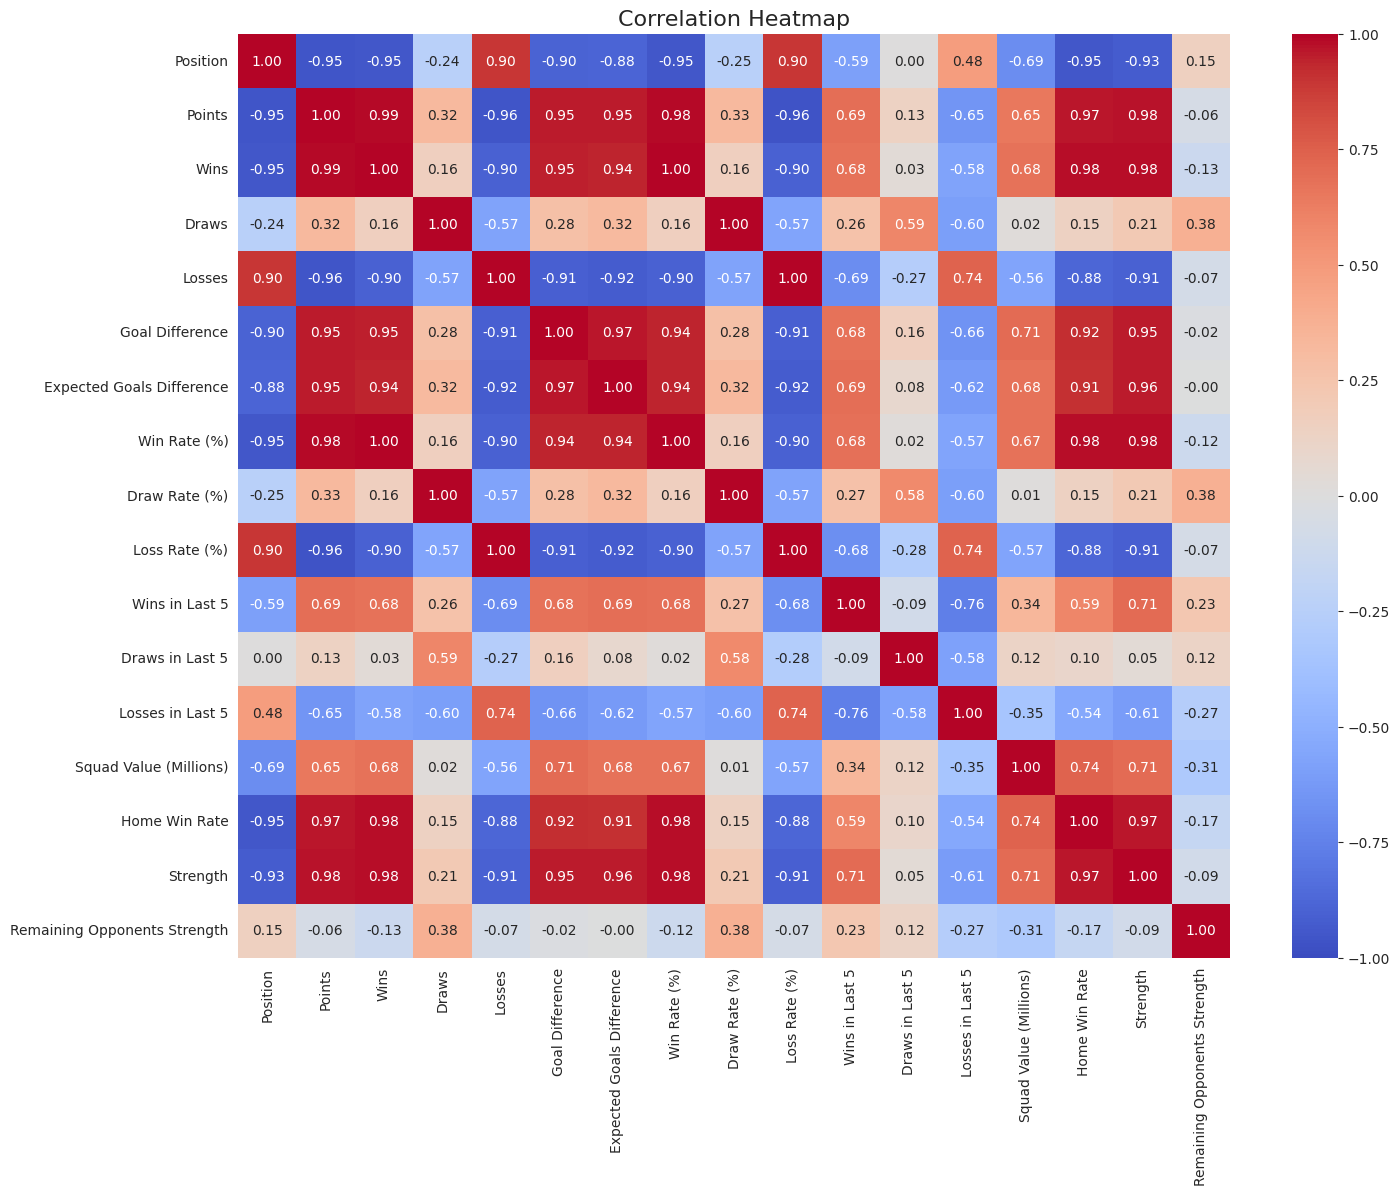

In [116]:
# Calculate the correlation matrix
correlation_matrix = current_table1[['Position', 'Points', 'Wins', 'Draws', 'Losses', 'Goal Difference',
                                     'Expected Goals Difference', 'Win Rate (%)',	'Draw Rate (%)', 'Loss Rate (%)',
                                     'Wins in Last 5',	'Draws in Last 5', 'Losses in Last 5', 'Squad Value (Millions)',
                                     'Home Win Rate', 'Strength', 'Remaining Opponents Strength']].corr()

plt.figure(figsize=(16, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar=True
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<ipython-input-141-fa8e9ee8254c>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


<Figure size 1400x700 with 0 Axes>

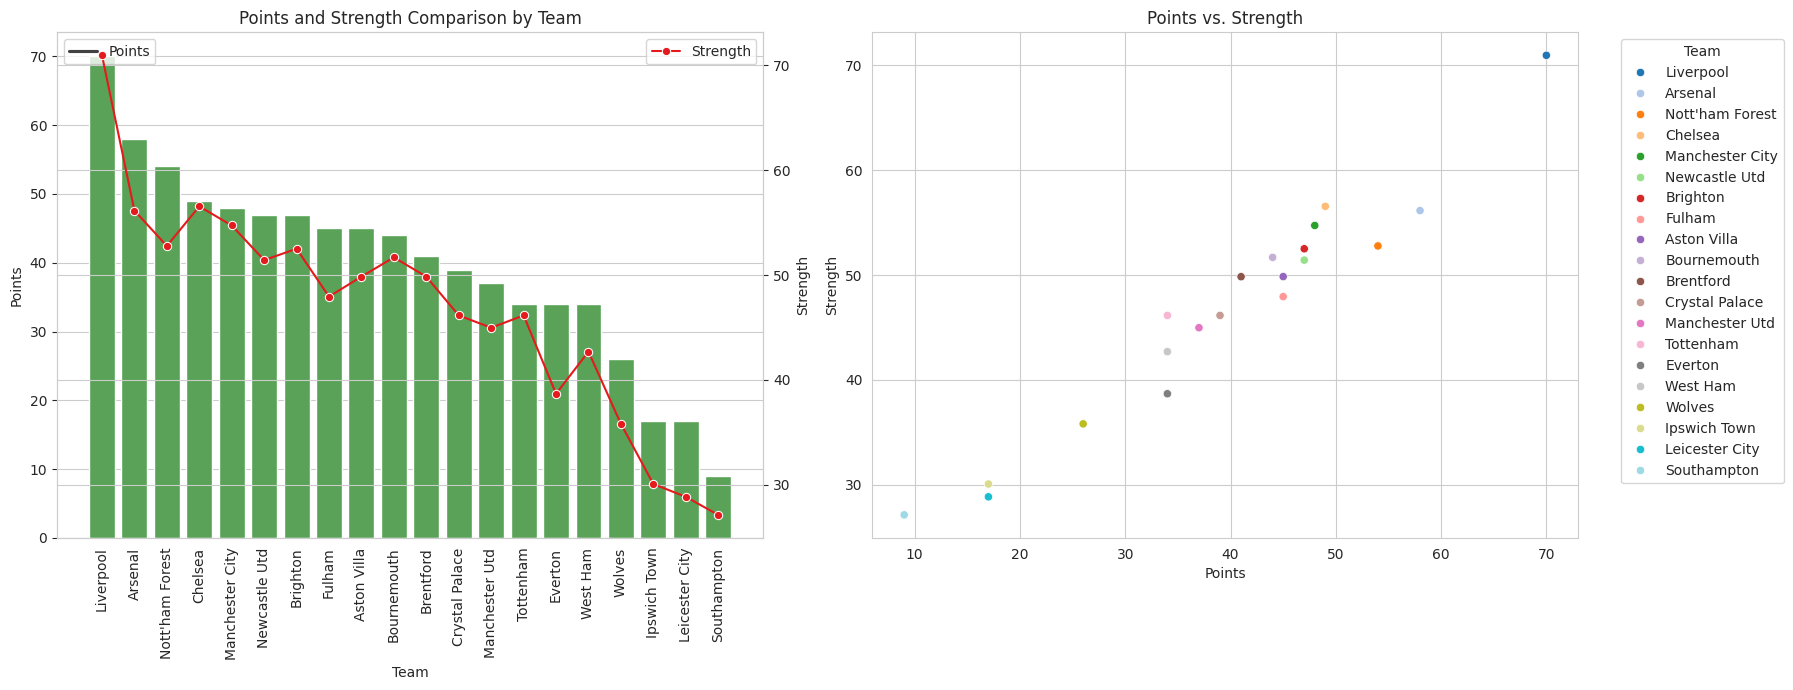

In [141]:
plt.figure(figsize=(14,7))

fig, ax = plt.subplots(1,2, figsize=(18,7))

palette = plt.get_cmap('Set1')
palette2 = sns.color_palette('tab20', 20)

ax1 = sns.barplot(data=current_table1, x='Team', y='Points', color=palette(2), ax=ax[0])
ax1.set_ylabel('Points')

ax2 = ax1.twinx()
sns.lineplot(data=current_table1, x='Team', y='Strength', marker='o', ax=ax2, sort=False, color=palette(0))
ax2.set_ylabel('Strength')

plt.title('Points and Strength Comparison by Team')
ax1.legend(['Points'], loc='upper left')
ax2.legend(['Strength'], loc='upper right')

plt.xticks(rotation=90)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)



ax3 = sns.scatterplot(data=current_table1, x='Points', y='Strength', hue='Team', palette=palette2, ax=ax[1])
ax3.set_xlabel('Points')
ax3.set_ylabel('Strength')
ax3.set_title('Points vs. Strength')
ax3.legend(title='Team', bbox_to_anchor=(1.05, 1), loc=2)
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

Analyzing the number of points a team has picked up along with their Strength provides some interesting results. From a strength standpoint, there are teams, like Nottingham Forest, Fulham, and even Everton, performing better than the stats indicate. Forest has been one of the standout teams this season, considering that they were fighting relegation last season and are now making a case for themselves in playing Champions League Football next season.

<ipython-input-139-27a0fa44ed0b>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


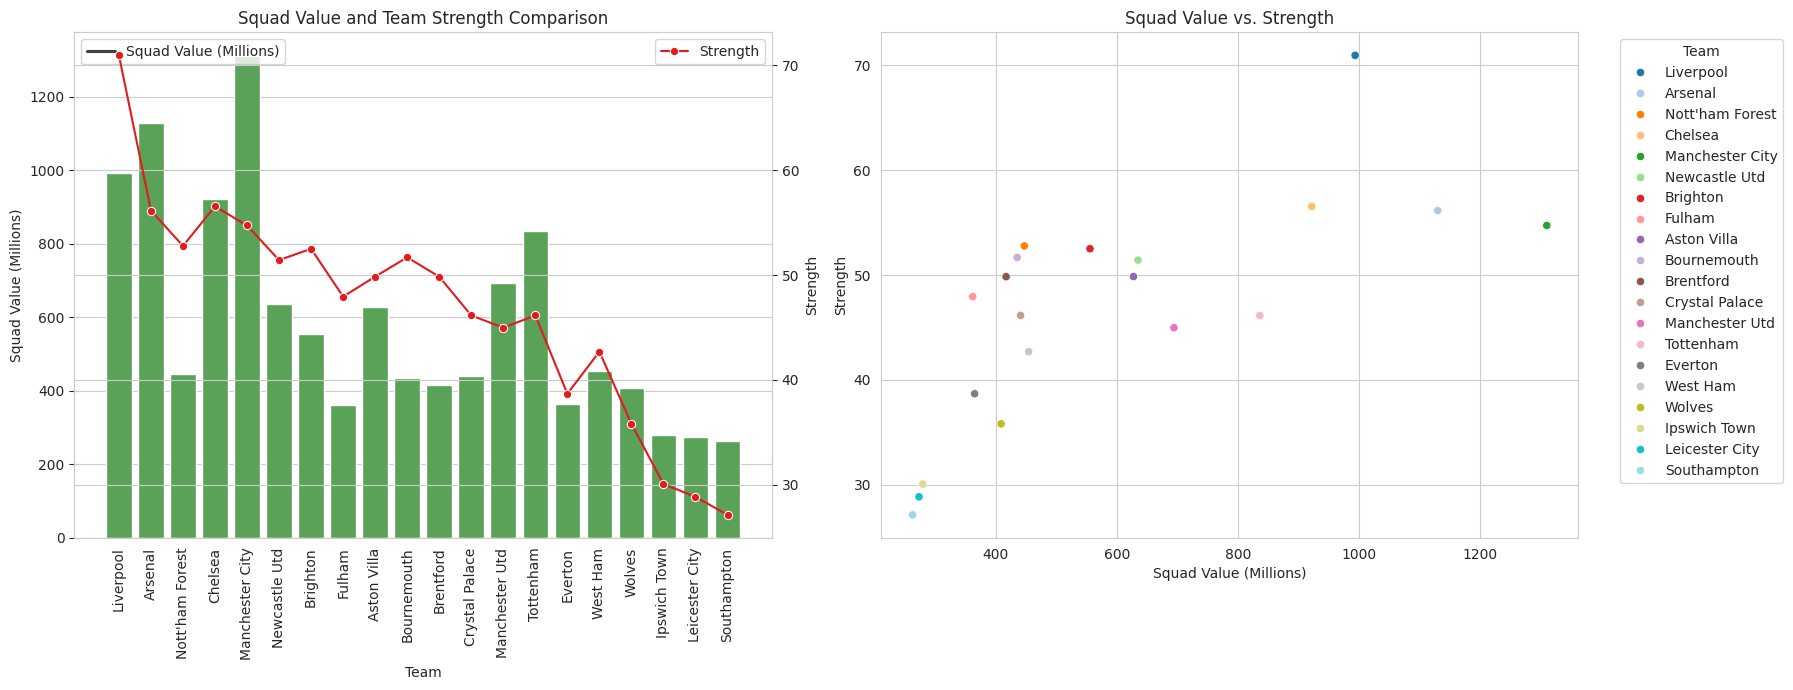

In [139]:
fig, ax = plt.subplots(1,2, figsize=(18,7))

palette = plt.get_cmap('Set1')
palette2 = sns.color_palette('tab20', 20)


ax1 = sns.barplot(data=current_table1, x='Team', y='Squad Value (Millions)', color=palette(2), ax=ax[0])
ax1.set_ylabel('Squad Value (Millions)')

ax2 = ax1.twinx()
sns.lineplot(data=current_table1, x='Team', y='Strength', marker='o', ax=ax2, sort=False, color=palette(0))
ax2.set_ylabel('Strength')

plt.title('Squad Value and Team Strength Comparison')
ax1.legend(['Squad Value (Millions)'], loc='upper left')
ax2.legend(['Strength'], loc='upper right')

plt.xticks(rotation=90)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax3 = sns.scatterplot(data=current_table1, x='Squad Value (Millions)', y='Strength', hue='Team', palette=palette2, ax=ax[1])
ax3.set_xlabel('Squad Value (Millions)')
ax3.set_ylabel('Strength')
ax3.set_title('Squad Value vs. Strength')
ax3.legend(title='Team', bbox_to_anchor=(1.05, 1), loc=2)
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

Squad value has long been an indicator of team success. When analyzing the squad values and strength of teams in the Premier League, we see a slightly even distribution between teams performing better than their values, and teams underperforming. Liverpool have the 3rd largest squad value and find themselves cemented at the top of the league. Manchester City have the largest squad value by far but find themselves in 5th position. Teams like Manchester United and Tottenham boast large squad values but are positioned near the end of the table.

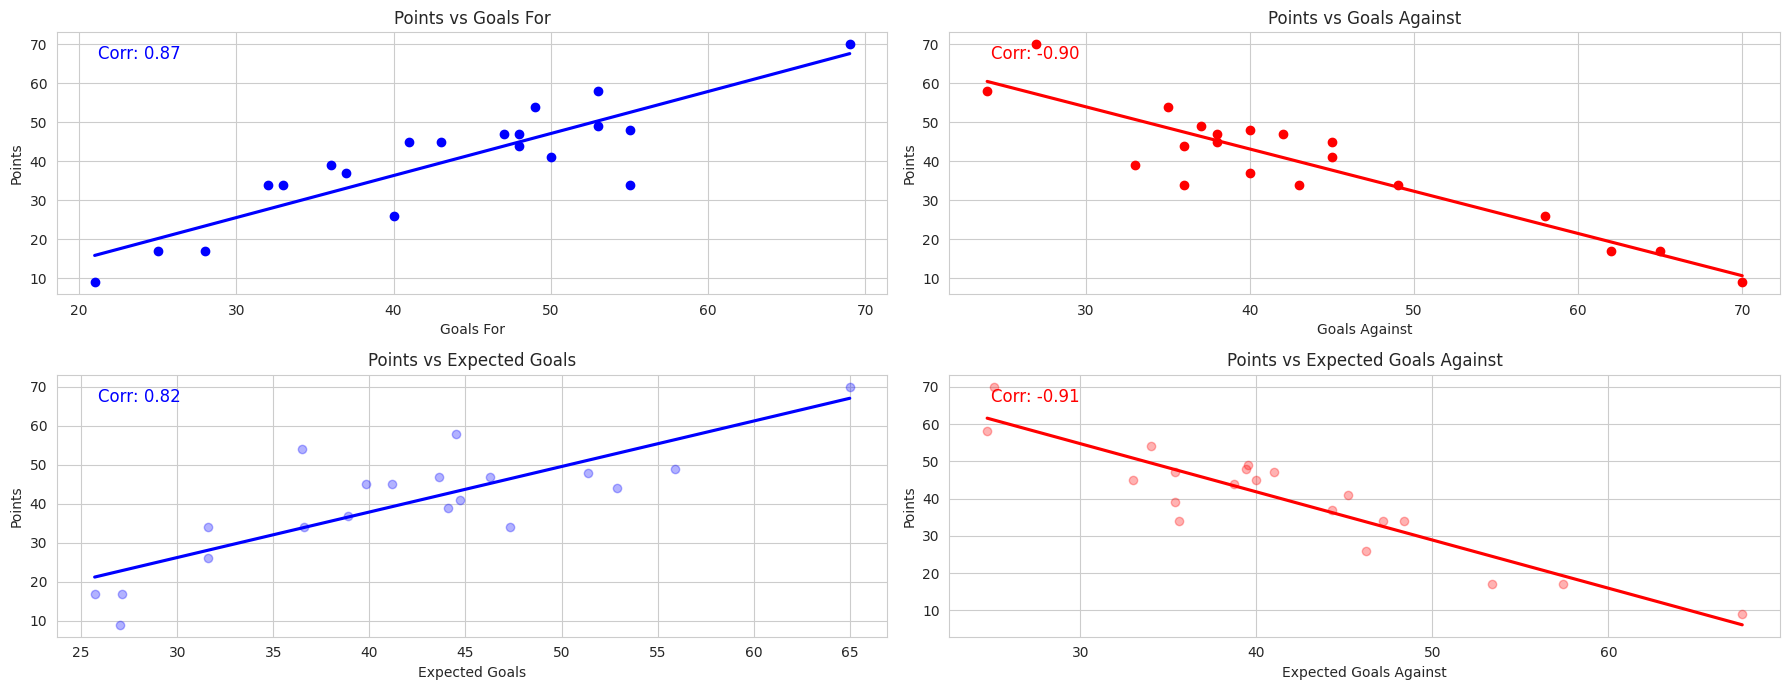

In [140]:
fig, ax = plt.subplots(2, 2, figsize=(18, 7))

def scatter_corr(ax, x, y, data, color, alpha):
    sns.regplot(x=x, y=y, data=data, ci=None, ax=ax, color=color, scatter_kws={'alpha': alpha, 'color': color})
    correlation = data[[x, y]].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f"Corr: {correlation:.2f}", transform=ax.transAxes,
            verticalalignment='top', fontsize=12, color=color)

# Plotting each subplot with correlation
scatter_corr(ax[0, 0], 'Goals For', 'Points', current_table1, 'blue', 1)
ax[0, 0].set_title('Points vs Goals For')
ax[0, 0].set_xlabel('Goals For')
ax[0, 0].set_ylabel('Points')

scatter_corr(ax[0, 1], 'Goals Against', 'Points', current_table1, 'red', 1)
ax[0, 1].set_title('Points vs Goals Against')
ax[0, 1].set_xlabel('Goals Against')
ax[0, 1].set_ylabel('Points')

scatter_corr(ax[1, 0], 'Expected Goals', 'Points', current_table1, 'blue', 0.3)
ax[1, 0].set_title('Points vs Expected Goals')
ax[1, 0].set_xlabel('Expected Goals')
ax[1, 0].set_ylabel('Points')

scatter_corr(ax[1, 1], 'Expected Goals Against', 'Points', current_table1, 'red', 0.3)
ax[1, 1].set_title('Points vs Expected Goals Against')
ax[1, 1].set_xlabel('Expected Goals Against')
ax[1, 1].set_ylabel('Points')


plt.tight_layout()
plt.show()



The correlations between Goals For, Goals Against, Expected Goals For, Expected Goals Against, and Points indicate that a team's defense may be a slightly more important factor in a team's success than a team's offense. The Goals Against metrics show stronger correlations between Poitns than the Goals For metrics, a reason why teams with fewer goals conceded find themselves higher positioned in the table.

In [122]:
data = current_table1.copy()
data.set_index('Team', inplace=True)
data

,Position,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Expected Goals,Expected Goals Against,Form (Last 5),Attendance,Top Team Scorer,Expected Goals Difference,Win Rate (%),Draw Rate (%),Loss Rate (%),Wins in Last 5,Draws in Last 5,Losses in Last 5,Squad Value (Millions),Home Matches,Home Wins,Home Win Rate,Strength,Remaining Opponents Strength
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,
Liverpool,1,29,21,7,1,69,27,42,70,65.0,25.1,W D W W W,60300,Mohamed Salah - 27,39.9,0.72,0.24,0.03,4,1,0,993.50,14,11,0.79,70.93,46.19
Arsenal,2,29,16,10,3,53,24,29,58,44.5,24.7,W L D D W,60277,Kai Havertz - 9,19.8,0.55,0.34,0.10,2,2,1,1130.00,14,9,0.64,56.14,45.99
Nott'ham Forest,3,29,16,6,7,49,35,14,54,36.5,34.0,L L D W W,30080,Chris Wood - 18,2.5,0.55,0.21,0.24,2,1,2,447.18,14,8,0.57,52.77,44.86
Chelsea,4,29,14,7,8,53,37,16,49,55.9,39.5,L L W W L,39610,Cole Palmer - 14,16.4,0.48,0.24,0.28,2,0,3,922.00,14,8,0.57,56.54,48.09
Manchester City,5,29,14,6,9,55,40,15,48,51.4,39.4,W L W L D,52897,Erling Haaland - 21,12.0,0.48,0.21,0.31,2,1,2,1310.00,14,8,0.57,54.72,41.24
Newcastle Utd,6,28,14,5,9,47,38,9,47,46.3,35.4,L L W L W,52189,Alexander Isak - 19,10.9,0.50,0.18,0.32,2,0,3,635.00,13,7,0.54,51.42,45.36
Brighton,7,29,12,11,6,48,42,6,47,43.6,41.0,W W W W D,32173,João Pedro - 8,2.6,0.41,0.38,0.21,4,1,0,555.60,14,6,0.43,52.50,46.86
Fulham,8,29,12,9,8,43,38,5,45,39.8,33.0,W L W L W,26592,Raúl Jiménez - 10,6.8,0.41,0.31,0.28,3,0,2,362.00,15,6,0.40,47.94,50.62
Aston Villa,9,29,12,9,8,41,45,-4,45,41.2,40.0,D D W L W,41958,Ollie Watkins - 13,1.2,0.41,0.31,0.28,2,2,1,627.50,15,7,0.47,49.85,47.70


In order to test the efficacy of these metrics on league position, we first employ a Linear Regression model with 20-fold-cross-validation to ensure that each team is used for testing once, thus obtaining a prediction for every team in the end.

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import  ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

X = data.drop(['Position', 'Form (Last 5)', 'Top Team Scorer'],  axis=1)

Y = data['Position']

# scaling numerical data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, make_column_selector(dtype_include=['int64', 'float64']))
    ], remainder = 'passthrough'
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# F-Fold CV
kf = KFold(n_splits=len(X), shuffle= True, random_state=42)
y_pred = cross_val_predict(pipeline, X, Y, cv=kf)
#y_pred_rounded = np.round(y_pred).astype(int)

predictions_df = pd.DataFrame({
    #'Team': X.index,
    'Actual Position after 28-29 games': Y,
    'Predicted Score': y_pred
})




predictions_df.sort_values('Predicted Score', ascending=True, inplace=True)
predictions_df['Predicted Position'] = range(1, len(predictions_df) + 1)

pd.set_option('display.width', 1000)  # Adjust this width according to your display capabilities
pd.set_option('display.max_columns', None)
print(predictions_df)

#y_pred = pipeline.predict(X_test
rmse = root_mean_squared_error(Y, y_pred)
mae = mean_absolute_error(Y, y_pred)
r2 = r2_score(Y, y_pred)


print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

                 Actual Position after 28-29 games  Predicted Score  Predicted Position
Team                                                                                   
Arsenal                                          2         1.062155                   1
Liverpool                                        1         2.004111                   2
Nott'ham Forest                                  3         2.623641                   3
Chelsea                                          4         4.007788                   4
Brighton                                         7         4.878283                   5
Manchester City                                  5         5.328180                   6
Newcastle Utd                                    6         6.588983                   7
Bournemouth                                     10         7.734979                   8
Fulham                                           8         8.403761                   9
Aston Villa                     

Interestingly, in this model, Arsenal is the dominant team over Liverpool, suggesting that the statistics indicate Arsenal should be obtaining better results leading to a higher league position. Teams like Brighton, and Bournemouth are in the same position, having lower league positions than their predicted positions. With an RMSE of 1.4, maybe a different model is more suitable.

In [124]:
!pip install scikit-optimize
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import XGBRegressor

X = data.drop(['Position', 'Form (Last 5)', 'Top Team Scorer'],  axis=1)

Y = data['Position']

# scaling numerical data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, make_column_selector(dtype_include=['int64', 'float64']))
    ], remainder = 'passthrough'
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(objective='reg:squarederror'))
    ]
)


kf = KFold(n_splits=len(X), shuffle= True, random_state=42)
y_pred = cross_val_predict(pipeline, X, Y, cv=kf)


predictions_df = pd.DataFrame({
    #'Team': X.index,
    'Actual Position after 28-29 games': Y,
    'Predicted Score': y_pred
})

predictions_df.sort_values('Predicted Score', ascending=True, inplace=True)
predictions_df['Predicted Position'] = range(1, len(predictions_df) + 1)

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(predictions_df)


rmse = root_mean_squared_error(Y, y_pred)
mae = mean_absolute_error(Y, y_pred)
r2 = r2_score(Y, y_pred)


print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')



                 Actual Position after 28-29 games  Predicted Score  Predicted Position
Team                                                                                   
Liverpool                                        1         2.001172                   1
Arsenal                                          2         3.006819                   2
Manchester City                                  5         4.175841                   3
Nott'ham Forest                                  3         4.545499                   4
Newcastle Utd                                    6         5.001136                   5
Chelsea                                          4         5.793769                   6
Brighton                                         7         7.546544                   7
Brentford                                       11         7.931881                   8
Aston Villa                                      9         8.000323                   9
Fulham                          

XGBoost proved to perform better than the Linear Regression model, as it handles nuanced data relationships effectively through its tree-based learning approach. With an RMSE of 1.28, this model gives a more accurate prediction for a team like Liverpool, placing them in first position. Interestingly, Manchester City rose to 3rd position from their previously predicted 6th position, and Chelsea dropped to 6th. The Linear Regression predicted Brentford to be in the 14th position, but this model raises them to 8th. Southampton represents an interesting change in position through this model, as they are predicted to be in 19th position from their actual 20th position, which is not very consistent with their stats and on-the-field play.

In [126]:
from sklearn.linear_model import Ridge

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=.1))
    ]
)


kf = KFold(n_splits=len(X), shuffle= True, random_state=42)
y_pred = cross_val_predict(pipeline, X, Y, cv=kf)

predictions_df = pd.DataFrame({
    #'Team': X.index,
    'Actual Position after 28-29 games': Y,
    'Predicted Score': y_pred
})

predictions_df.sort_values('Predicted Score', ascending=True, inplace=True)
predictions_df['Predicted Position'] = range(1, len(predictions_df) + 1)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(predictions_df)


rmse = root_mean_squared_error(Y, y_pred)
mae = mean_absolute_error(Y, y_pred)
r2 = r2_score(Y, y_pred)


print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


                 Actual Position after 28-29 games  Predicted Score  Predicted Position
Team                                                                                   
Arsenal                                          2         0.626772                   1
Liverpool                                        1         1.315737                   2
Chelsea                                          4         4.401950                   3
Nott'ham Forest                                  3         5.223812                   4
Brighton                                         7         5.509345                   5
Newcastle Utd                                    6         6.297369                   6
Manchester City                                  5         6.744835                   7
Bournemouth                                     10         7.987920                   8
Aston Villa                                      9         9.040424                   9
Fulham                          

In order to reduce model complexity and prevent overfitting, I employ the Ridge Regression, as it is effective in cases of multicollinearity as is the case among these metrics. This model boasts the smallest RMSE with 1.2, but still predicts Arsenal is the most dominant team in the league. Arsenal's Squad Value and their defensive prowess may be the reason for this prediction, but this situation speaks to the care needed when analyzing statistics, especially when there is an over-reliance on such stats to the detriment of actual on-the-pitch events.

## Conclusion

In exploring the Premier League standings based on underlying team statistics, I employed 3 statistical models, each presenting unique insights through their predictive capabilities. While Ridge Regression yielded the lowest RMSE, suggesting a high degree of statistical accuracy, it interestingly placed Arsenal at the top of the league, which contrasts with the assessments of Premier League fans who would favor Liverpool.

This situation brings about a critical lesson regarding sports analytics. They are powerful tools for understanding patterns and predicting outcomes, but they cannot encapsulate the full spectrum of variables, both quantitative and qualitative, that influence on-the-pitch sporting events. Football is a dynamic and emotionally charged sport, and it is influenced by a plethora of factors that are sometimes not immediately quantifiable. While we introduced custom-engineered features such as 'Team Strength' and 'Home Win Rate', our results show that the highest statistical accuracy does not always align with the knowledge and expectations that seasoned viewers and analysts hold.

Moving forward, the predictive models can be enhanced through the integration of historical performance data from past seasons to provide depth. Also, blending statistical analysis with qualitative assessments such as player psychology, tactical patterns, and game-day conditions will enrich the understanding and predictions of football outcomes.